In [43]:
from collections import defaultdict
from rdkit import Chem
from IPython.display import display, Markdown

def composition(molecule, isotopes=False):
    if molecule:
        Chem.AddHs(molecule)
        comp = defaultdict(lambda: 0)
        for atom in molecule.GetAtoms():
            element_symbol = atom.GetSymbol()
            if not isotopes:
                comp[element_symbol] += 1
            else:
                isotope = atom.GetIsotope()
                try:
                    comp[element_symbol][isotope] += 1
                except:
                    comp[element_symbol] = defaultdict(lambda: 0)
                    comp[element_symbol][isotope] += 1
        return comp

def convert_smiles_to_markdown_formula(smiles, isotopes=False):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        comp = composition(mol, isotopes)

        isotopes = defaultdict(lambda: defaultdict(str))
        subscripts = defaultdict(lambda: defaultdict(int))
        superscripts = defaultdict(list)

        for element, counts in comp.items():
            for isotope, count in counts.items():
                if count > 1:
                    subscripts[element][isotope] = count
                if isotope != 0:
                    superscripts[element].append(isotope)

                isotopes[element][isotope] = 1
            # Sort the element's isotopes from lowest to highest
            superscripts[element].sort()

        formula = {'markdown': "", 'dollar_math': ""}
        sorted_element_keys = sorted(isotopes.keys())
        for element in sorted_element_keys:
            isotope_count_pairs = isotopes[element]
            # Sort the element's isotopes from lowest to highest
            sorted_isotope_keys = sorted(isotope_count_pairs.keys())
            for isotope in sorted_isotope_keys:
                if element in superscripts:
                    if isotope in superscripts[element]:
                        formula["markdown"] += f"<sup>{isotope}</sup>"
                        # formula["dollar_math"] += f"$^\{isotope}$"
                        formula["dollar_math"] += "$^\{" + f"{isotope}" + "}$"
                formula["markdown"] += element
                formula["dollar_math"] += element
                if element in subscripts:
                    if isotope in subscripts[element]:
                        for isotope, isotope_count in subscripts[element].items():
                            formula["markdown"] += f"<sub>{isotope_count}</sub>"
                            formula["dollar_math"] += f"$_{isotope_count}$"
        display(Markdown(formula["markdown"]))
    else:
        return "Invalid SMILES"

# Example usage
smiles = "[18O]O[18O][16O][12C][13C]C[13C]"
convert_smiles_to_markdown_formula(smiles, isotopes=True)


C<sup>12</sup>C<sup>13</sup>C<sub>2</sub>O<sup>16</sup>O<sup>18</sup>O<sub>2</sub>

In [38]:
def list_to_markdown_table(data, headers=None):
    """
    Convert a list of lists into a Markdown table.
    
    Args:
        data (list): A list of lists, where each inner list corresponds to a row in the table.
        headers (list): An optional list of column headers.

    Returns:
        str: The Markdown-formatted table as a string.
    """
    if not data:
        return ""

    # Determine the number of columns
    num_columns = len(data[0])

    # Create the table headers if provided
    table = "|"
    if headers:
        table += " | ".join(headers) + " |\n"

        # Create the title divider line
        table += "|"
        for _ in range(num_columns):
            table += " --- |"
        table += "\n"

    # Create the table body
    for row in data:
        if len(row) != num_columns:
            raise ValueError("All rows must have the same number of columns")
        table += "| " + " | ".join(map(str, row)) + " |\n"

    return table


In [40]:
data = [
    ["Alice", 25, "Engineer"],
    ["Bob", 30, "Designer"],
    ["Charlie", 35, "Manager"]
]

# Create the table with headers
table = list_to_markdown_table(data, headers=["Name", "Age", "Occupation"])

# Print or display the table
display(Markdown(table))


|Name | Age | Occupation |
| --- | --- | --- |
| Alice | 25 | Engineer |
| Bob | 30 | Designer |
| Charlie | 35 | Manager |


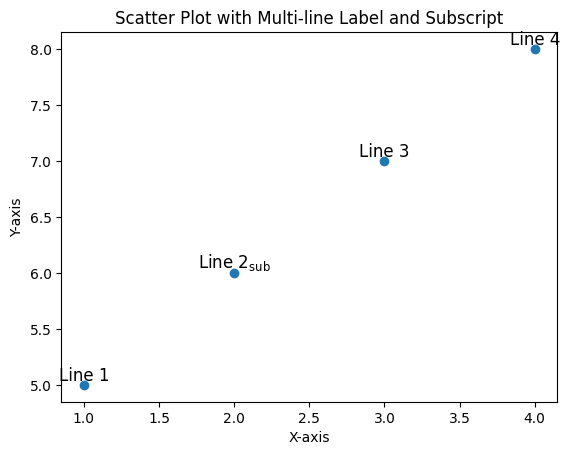

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Enable Matplotlib's built-in math rendering
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
plt.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
plt.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

# Sample data
x = [1, 2, 3, 4]
y = [5, 6, 7, 8]
labels = ['Line 1', r'Line 2$_{\text{sub}}$', 'Line 3', 'Line 4']

# Create a scatter plot with multi-line labels
plt.scatter(x, y)
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=12, verticalalignment='bottom', horizontalalignment='center', multialignment='center')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Multi-line Label and Subscript')
plt.show()


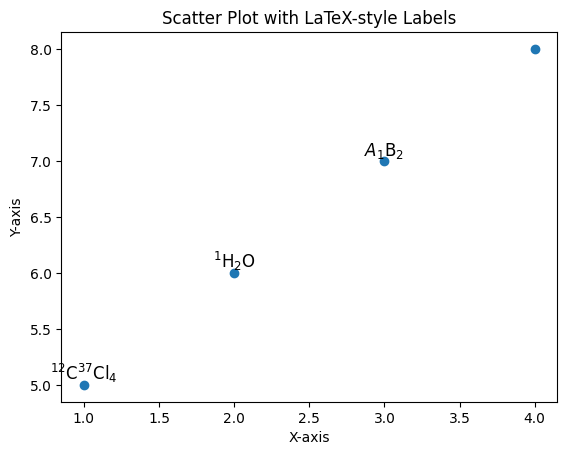

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4]
y = [5, 6, 7, 8]

# Labels using LaTeX-style formatting
labels = [r'$^{12}$C$^{37}$Cl$_4$', r'$^1$H$_2$O', r'$A_1$B$_2$']

# Create a scatter plot with labels
plt.scatter(x, y)
for i, label in enumerate(labels):
    plt.text(x[i], y[i], label, fontsize=12, verticalalignment='bottom', horizontalalignment='center', multialignment='center')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with LaTeX-style Labels')
plt.show()


In [67]:
from IPython.display import Markdown, Math

# Define the chemical formula as a LaTeX string
chemical_formula = "$^{12}C$"
# chemical_formula = "$x_{2}$"

# Display the chemical formula using Markdown
display(Markdown(chemical_formula))

$^{12}C$

In [55]:
display(Math(chemical_formula))

<IPython.core.display.Math object>

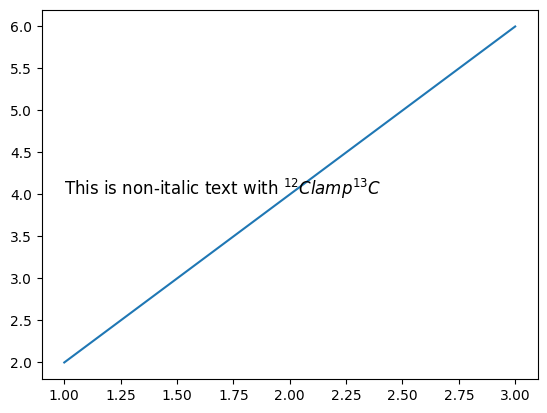

In [69]:
import matplotlib.pyplot as plt

# Define a variable containing the string you want to insert
variable_value = "$^{12}Clamp^{13}C$"

# Create a non-LaTeX-formatted label with the variable value
label = "This is non-italic text with " + variable_value

# Create a sample plot
plt.plot([1, 2, 3], [2, 4, 6])

# Add the non-LaTeX-formatted label to the plot
plt.text(1, 4, label, fontsize=12)

# Show the plot
plt.show()


In [71]:
# Define a string with custom placeholders
template = "This is a {custom_placeholder} example with {another_custom}."

# Replace custom placeholders with curly braces
template = template.replace("{custom_placeholder}", "{}").replace("{another_custom}", "{}")

# Use .format() with the modified template
formatted_string = template.format("custom", "placeholders")

# Print the formatted string
print(formatted_string)


This is a custom example with placeholders.


In [72]:
# Define a string with placeholders
template = "This is a %s example with %d."

# Use C-style string formatting with the % operator
formatted_string = template % ("C-style", 42)

# Print the formatted string
print(formatted_string)


This is a C-style example with 42.


In [77]:
import re

# Define a function to insert \! between subscripts and superscripts
def insert_bang_between_subscripts_and_superscripts(input_string):
    # Define a regular expression pattern to find and replace subscripts immediately followed by superscripts
    # pattern = r'_(\d+)\}\^\{(\d+)\}'
    pattern = r'_{(\d+)}\^{(\d+)}'

    # Define a replacement function to insert \! between the subscript and superscript
    def replace(match):
        return '_{\\1}\\!^{\\2}'

    # Use re.sub to apply the replacement function
    modified_string = re.sub(pattern, replace, input_string)

    return modified_string

# Example usage
input_string = "$^{12}C_{2}^{13}C^{14}C_{3}$"
modified_string = insert_bang_between_subscripts_and_superscripts(input_string)
print(modified_string)
Markdown(modified_string)

$^{12}C_{\1}\!^{\2}C^{14}C_{3}$


$^{12}C_{\1}\!^{\2}C^{14}C_{3}$

In [80]:
import re

# Define a function to insert \! between subscripts and superscripts
def insert_bang_between_subscripts_and_superscripts(input_string):
    # Define a regular expression pattern to find subscripts immediately followed by superscripts
    pattern = r'_{(\d+)}\^{(\d+)}'

    # Define a replacement function to insert \! between the subscript and superscript
    def replace(match):
        return '_{\\1}\\!^{\\2}'

    # Use re.sub to apply the replacement function
    modified_string = re.sub(pattern, replace, input_string)

    return modified_string

# Example usage
input_string = "$^{12}C_{2}^{13}C^{14}C_{3}$"
modified_string = insert_bang_between_subscripts_and_superscripts(input_string)
print(modified_string)


$^{12}C_{\1}\!^{\2}C^{14}C_{3}$


In [79]:
import re

# Define the input string
input_string = "This is a sample chemical formula _{3}^{37} with subscripts and superscripts."

# Define a regular expression pattern to find subscripts immediately followed by superscripts
pattern = r'_{(\d+)}\^{(\d+)}'

# Find all matches in the string
matches = re.findall(pattern, input_string)

# Iterate through the matches
for match in matches:
    print("Match found:", match)


Match found: ('3', '37')


In [81]:
# Define a string
my_string = "This is my string"

# Add a backslash using its character code
my_string += chr(92)

# Print the modified string
print(my_string)


This is my string\


In [93]:
def smiles_to_formatted_formula(smiles, isotopes=False):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        comp = composition(mol, isotopes)

        formula = {'markdown': "", 'dollar_math': "", 'latex': ""}

        if isotopes:
            isotopes_dict = defaultdict(lambda: defaultdict(str))
            subscripts = defaultdict(lambda: defaultdict(int))
            superscripts = defaultdict(list)

            for element, counts in comp.items():
                for isotope, count in counts.items():
                    if count > 1:
                        subscripts[element][isotope] = count
                    if isotope != 0:
                        superscripts[element].append(isotope)

                    isotopes_dict[element][isotope] = 1
                # Sort the element's isotopes from lowest to highest
                superscripts[element].sort()

            last_item_is_subscript = False
            sorted_element_keys = sorted(isotopes_dict.keys())
            for element in sorted_element_keys:
                isotope_count_pairs = isotopes_dict[element]
                # Sort the element's isotopes from lowest to highest
                sorted_isotope_keys = sorted(isotope_count_pairs.keys())
                for isotope in sorted_isotope_keys:
                    if element in superscripts:
                        if isotope in superscripts[element]:
                            formula["markdown"] += f"<sup>{isotope}</sup>"
                            formula["dollar_math"] += r"$^{{{}}}$".format(isotope)
                            # If superscript immediately follows subscript, 
                            # add space to prevent them from vertically overlapping
                            if last_item_is_subscript:
                                formula["latex"] += "~"  # Escape the backslash
                            formula["latex"] += "^{{{}}}".format(isotope)
                            last_item_is_subscript = False
                    formula["markdown"] += element
                    formula["dollar_math"] += r"{}".format(element)
                    formula["latex"] += element
                    last_item_is_subscript = False
                    if element in subscripts:
                        if isotope in subscripts[element]:
                            for isotope, isotope_count in subscripts[element].items():
                                formula["markdown"] += f"<sub>{isotope_count}</sub>"
                                formula["dollar_math"] += r"$_{{{}}}$".format(isotope_count)
                                formula["latex"] += "_{{{}}}".format(isotope_count)
                        last_item_is_subscript = True
            formula["latex"] = "$" + formula["latex"] + "$"
        else:
            # Handling the case when isotopes is False
            sorted_element_keys = sorted(comp.keys())

            for element in sorted_element_keys:
                count = comp[element]
                formula["markdown"] += element
                formula["dollar_math"] += r"{}".format(element)
                formula["latex"] += element
                if count > 1:
                    formula["markdown"] += f"<sub>{count}</sub>"
                    formula["dollar_math"] += r"$_{{{}}}$".format(count)
                    formula["latex"] += "_{{{}}}".format(count)
            formula["latex"] = "$" + formula["latex"] + "$"

        return formula
    else:
        return "Invalid SMILES"


In [94]:
isotope_formula = smiles_to_formatted_formula("CC[16O]", isotopes=True)
print(isotope_formula["latex"])
print(isotope_formula)
Markdown(isotope_formula["latex"])

$C_{2}~^{16}O$
{'markdown': 'C<sub>2</sub><sup>16</sup>O', 'dollar_math': 'C$_{2}$$^{16}$O', 'latex': '$C_{2}~^{16}O$'}


$C_{2}~^{16}O$

In [109]:
from chemparse import parse_formula
def convert_smiles_to_formula(smiles):
    parsed_formula = parse_formula(smiles)

    elements = {}
    subscripts = {}
    superscripts = {}

    for element, count in parsed_formula.items():
        element_symbol = element
        element_isotope = element.isotope

        if count > 1:
            subscripts[element_symbol] = count

        if element_isotope is not None:
            superscripts[element_symbol] = element_isotope

        if element_symbol not in elements:
            elements[element_symbol] = 1
        else:
            elements[element_symbol] += 1

    formula = ""
    for element, count in elements.items():
        formula += element
        if element in subscripts:
            formula += str(subscripts[element])
        if element in superscripts:
            formula += f"[{superscripts[element]}]"
        if count > 1:
            formula += str(count)

    return formula

# Example usage
smiles = "[13C]C[18O]"
formula = convert_smiles_to_formula(smiles)
formula


''